# I. Importing Libraries

First thing first, like always, we need to import the data and libraries we need. Libraries that we need is **numpy** for linear algebra calculation and **pandas** for data processing. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hr-analytics-case-study/out_time.csv
/kaggle/input/hr-analytics-case-study/manager_survey_data.csv
/kaggle/input/hr-analytics-case-study/employee_survey_data.csv
/kaggle/input/hr-analytics-case-study/data_dictionary.xlsx
/kaggle/input/hr-analytics-case-study/in_time.csv
/kaggle/input/hr-analytics-case-study/general_data.csv


# II. Importing Data and Analysis

Now, we got the list of locations of all files we need. The next step is uploading all of them. We would be using some functions to make the process simple here. 

In [2]:
locs = []

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        locs.append(os.path.join(dirname, filename))
        
locs.remove(locs[3])

df_names = [x.split('/')[-1].split('.')[0] for x in locs]
df_stats = [x.split('/')[-1].split('.')[1] for x in locs]
df = {}

for i, n in enumerate(df_names):
    df[n] = pd.read_csv(locs[i])

In [3]:
df[df_names[0]].head(3)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50


In [4]:
df[df_names[1]].head(3)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3


In [5]:
print('Job involvement max', df[df_names[1]].JobInvolvement.max())
print('Performance rating max', df[df_names[1]].PerformanceRating.max())
print('Job involvement min', df[df_names[1]].JobInvolvement.min())
print('Performance rating min', df[df_names[1]].PerformanceRating.min())
print('Number of Employees', len(df[df_names[1]]))

Job involvement max 4
Performance rating max 4
Job involvement min 1
Performance rating min 3
Number of Employees 4410


In [6]:
df[df_names[2]].head(3)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0


In [7]:
df[df_names[3]].head(3)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39


In [8]:
df[df_names[4]].head(3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3


In [9]:
df[df_names[4]].columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

## Correlation Analysis

The parameter that we think is very related to how loyal a worker to a company is their job satisfaction. That is why we will just make some correlation calculation on some parameters based on each employee's job satisfaction. 

In [10]:
the_table = pd.concat([df[df_names[2]].JobSatisfaction, df[df_names[4]]], axis=1)
the_table_corr = the_table.corr()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Age'),
  Text(1, 0, 'DistanceFromHome'),
  Text(2, 0, 'Education'),
  Text(3, 0, 'EmployeeCount'),
  Text(4, 0, 'EmployeeID'),
  Text(5, 0, 'JobLevel'),
  Text(6, 0, 'MonthlyIncome'),
  Text(7, 0, 'NumCompaniesWorked'),
  Text(8, 0, 'PercentSalaryHike'),
  Text(9, 0, 'StandardHours'),
  Text(10, 0, 'StockOptionLevel'),
  Text(11, 0, 'TotalWorkingYears'),
  Text(12, 0, 'TrainingTimesLastYear'),
  Text(13, 0, 'YearsAtCompany'),
  Text(14, 0, 'YearsSinceLastPromotion'),
  Text(15, 0, 'YearsWithCurrManager')])

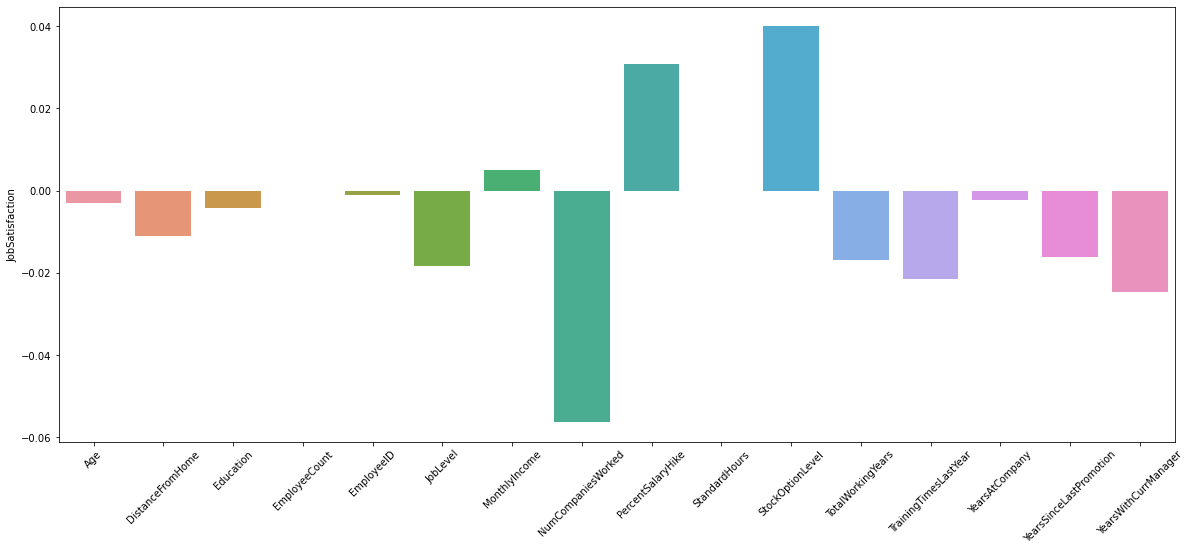

In [11]:
the_table = pd.concat([df[df_names[2]].JobSatisfaction, df[df_names[4]]], axis=1)
the_table_corr = the_table.corr()
the_table_corr = the_table_corr.drop(['JobSatisfaction'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
sns.barplot(x=the_table_corr.index, y=the_table_corr.JobSatisfaction)
plt.xticks(rotation=45)

We see above that the most important features to determine employee's job satisfactions are:
1. **Number companies worked**
The number one feature, which is number companies worked probably means a number an employee have worked for before.  

2. **Percent salary hike**
which means the increase of salary that an employee has. From this, we know that what determines employee's satisfaction is the increase of salary rather than the number of salary itself. It proved how emotional a human being is. 

3. **Stock options level**
This is how much stock they have on the company. Some high position on a company let that employee to have some stocks on the company.  